# Task 4.10 - Part 1.2

##### This script contains the following points:

#### Import libraries

#### Import data

#### 5. Create profiling variables based on age, income, certain 'department_id' goods, and number of dependents

#### 6. Create visualizations to show the distribution of profiles

#### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

#### 8. Compare customer profiles with regions and departments. Identify links between them

#### 9. Produce suitable charts to illustrate results and export them to project folder

#### 10. Tidy up script, export final data set, save notebook

#### Charts for achievement questions

# __________________________________________________________________

## Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import data

In [2]:
# Set Path
path = r'/Users/mainframe/Documents/Instacart Basket Analysis'

In [3]:
df_acc = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'acceptable_customers.pkl'))

In [4]:
df_acc.head()

,order_id,user_id,order_number,orders_day_of_week,hour_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,dependents,marital,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


## 5. Create profiling variables based on age, income, certain 'department_id' goods, and number of dependents

In [5]:
# Set up 'age_group' variable
df_acc.loc[df_acc['age'] < 28, 'age_group'] = 'Gen Z'
df_acc.loc[(df_acc['age'] >= 28) & (df_acc['age'] <= 43), 'age_group'] = 'Millenial'
df_acc.loc[(df_acc['age'] >= 44) & (df_acc['age'] <= 59), 'age_group'] = 'Gen X'
df_acc.loc[(df_acc['age'] >= 60) & (df_acc['age'] <= 78), 'age_group'] = 'Baby Boomer'
df_acc.loc[df_acc['age'] > 78, 'age_group'] = 'Silent Gen'

In [6]:
# Check distribution of 'age_group' variable
df_acc['age_group'].value_counts()

age_group
Baby Boomer    9087570
Gen X          7805548
Millenial      7729031
Gen Z          4855481
Silent Gen     1486934
Name: count, dtype: int64

In [7]:
# Set up 'income_level' variable
df_acc.loc[df_acc['income'] < 40000, 'income_level'] = 'Lower'
df_acc.loc[(df_acc['income'] >= 40000) & (df_acc['income'] <= 80000), 'income_level'] = 'Lower-Middle'
df_acc.loc[(df_acc['income'] >= 80001) & (df_acc['income'] <= 120000), 'income_level'] = 'Middle'
df_acc.loc[(df_acc['income'] >= 120001) & (df_acc['income'] <= 160000), 'income_level'] = 'Upper-Middle'
df_acc.loc[df_acc['income'] > 160000, 'income_level'] = 'Upper'

In [8]:
# Check distribution of 'income_level' variable
df_acc['income_level'].value_counts()

income_level
Middle          10793131
Lower-Middle     9379895
Upper-Middle     7051576
Upper            2127937
Lower            1612025
Name: count, dtype: int64

In [9]:
# Check distribution of 'dependents' variable
df_acc['dependents'].value_counts()

dependents
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

##### It's difficult to see any reason to set up a separate profile for number of dependents when there are only four possilble outcomes to begin with.

In [10]:
# Import departments_wrangled.csv
df_depw = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv')) 

In [11]:
df_depw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [12]:
# Rename unnamed column
df_depw.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [13]:
df_depw

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [14]:
# Change data type to match other dataframe
df_depw['department_id'] = df_depw['department_id'].astype('uint8')

In [15]:
# Add/merge department names to dataframe
df_acc_d = pd.merge(df_acc, df_depw, on = 'department_id', how = 'left')

In [16]:
df_acc_d.head()

,order_id,user_id,order_number,orders_day_of_week,hour_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,dependents,marital,income,region,age_group,income_level,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,Millenial,Lower-Middle,beverages
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,South,Millenial,Lower-Middle,dairy eggs
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Alabama,31,2/17/2019,3,married,40423,South,Millenial,Lower-Middle,snacks
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Alabama,31,2/17/2019,3,married,40423,South,Millenial,Lower-Middle,snacks
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Alabama,31,2/17/2019,3,married,40423,South,Millenial,Lower-Middle,household


In [17]:
# Set up 'drinker' variable based on whether or not a user has ordered anything from the 'alcohol' 'department'
df_acc_d['drinker'] = ['Yes' if x == 'alcohol' else 'No' for x in df_acc_d['department']]
df_acc_d['drinker'] = df_acc_d.groupby('user_id')['drinker'].transform('max')

In [18]:
df_acc_d['drinker'].value_counts()

drinker
No     28634074
Yes     2330490
Name: count, dtype: int64

In [19]:
# Set up 'meat_eater' variable based on whether or not a user has ordered anything from the 'meat seafood' 'department'
df_acc_d['meat_eater'] = ['Yes' if x == 'meat seafood' else 'No' for x in df_acc_d['department']]
df_acc_d['meat_eater'] = df_acc_d.groupby('user_id')['meat_eater'].transform('max')

In [20]:
# Check distribution of 'meat_eater' variable
df_acc_d['meat_eater'].value_counts()

meat_eater
Yes    23065332
No      7899232
Name: count, dtype: int64

In [21]:
# Set up 'buys_in_bulk' variable based on whether or not a user has ordered anything from the 'bulk' 'department'
df_acc_d['buys_in_bulk'] = ['Yes' if x == 'bulk' else 'No' for x in df_acc_d['department']]
df_acc_d['buys_in_bulk'] = df_acc_d.groupby('user_id')['buys_in_bulk'].transform('max')

In [22]:
# Check distribution of 'buys_in_bulk' variable
df_acc_d['buys_in_bulk'].value_counts()

buys_in_bulk
No     26832984
Yes     4131580
Name: count, dtype: int64

## 6. Create visualizations to show the distribution of profiles

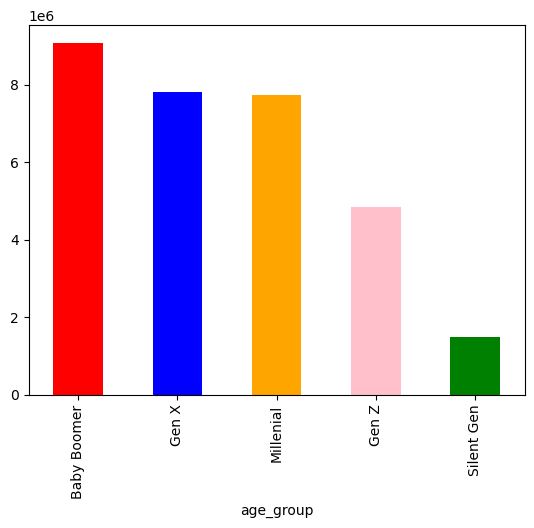

In [23]:
# Create bar chart of age group profile
age_bar = df_acc_d['age_group'].value_counts().plot.bar(color = ['red', 'blue', 'orange', 'pink', 'green'])

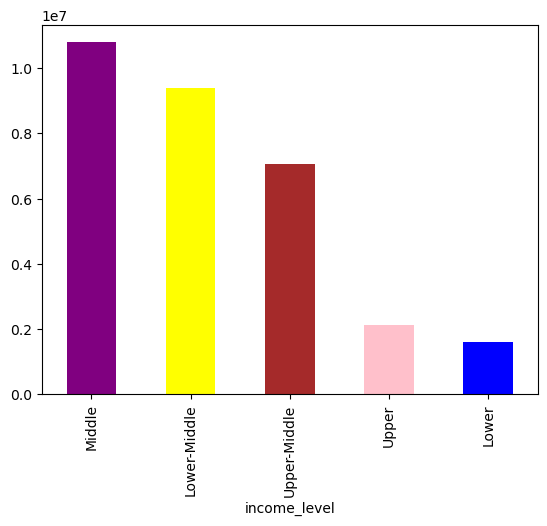

In [24]:
# Create bar chart of income level profile
income_bar = df_acc_d['income_level'].value_counts().plot.bar(color = ['purple', 'yellow', 'brown', 'pink', 'blue'])

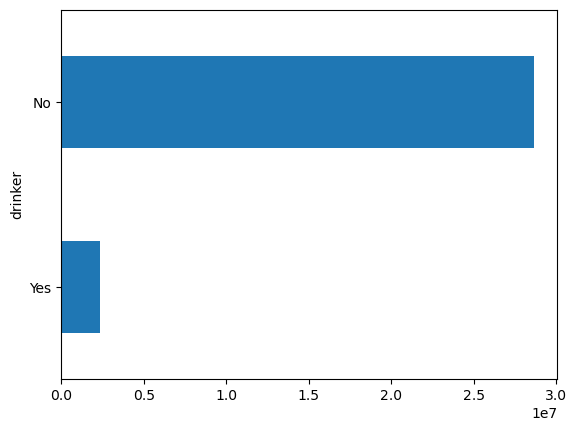

In [25]:
# Create bar chart of drinker profile
drinker_bar = df_acc_d['drinker'].value_counts().sort_values().plot.barh()

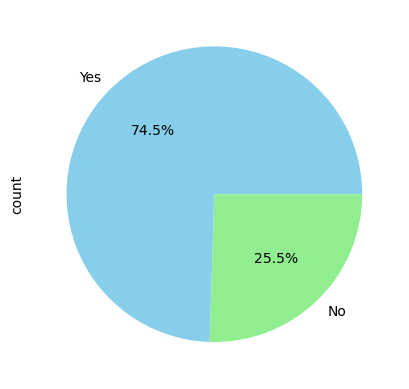

In [26]:
# Create pie chart of meat eater profile
meat_pie = df_acc_d['meat_eater'].value_counts().plot.pie(autopct = ('%1.1f%%'), colors = ['skyblue', 'lightgreen'])

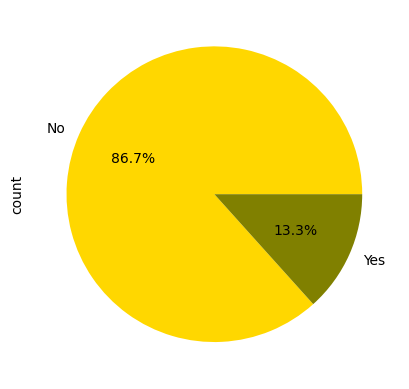

In [27]:
# Create pie chart of buys in bulk profile
bulk_pie = df_acc_d['buys_in_bulk'].value_counts().plot.pie(autopct = ('%1.1f%%'), colors = ['gold', 'olive'])

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [28]:
df_acc_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 37 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       uint32 
 1   user_id                        uint32 
 2   order_number                   uint8  
 3   orders_day_of_week             uint8  
 4   hour_ordered                   uint8  
 5   days_since_prior_order         float16
 6   product_id                     uint16 
 7   add_to_cart_order              uint8  
 8   reordered                      int8   
 9   product_name                   object 
 10  aisle_id                       uint8  
 11  department_id                  uint8  
 12  prices                         float64
 13  price_range_loc                object 
 14  busiest_day                    object 
 15  busiest_days                   object 
 16  busiest_period_of_day          object 
 17  max_order                      uint8  
 18  

In [29]:
# Aggregations for age_group
df_acc_d.groupby('age_group').agg({'median_days_since_prior_order' : ['mean', 'min', 'max'], 'mean_prices' : ['mean', 'min', 'max']})

median_days_since_prior_order            mean_prices            \
                                     mean  min   max        mean       min   
age_group                                                                    
Baby Boomer                      9.958877  0.0  30.0   11.848988  1.262500   
Gen X                            9.988686  0.0  30.0   12.149430  1.000000   
Gen Z                            9.934548  0.0  30.0   12.081703  1.628571   
Millenial                        9.947955  0.0  30.0   11.908428  1.000000   
Silent Gen                       9.902434  0.0  30.0   10.963318  2.000000   

                           
                      max  
age_group                  
Baby Boomer   7414.485185  
Gen X        15006.940000  
Gen Z        10209.987755  
Millenial     6983.593023  
Silent Gen   14042.512281

In [30]:
# Aggregations for income_level
df_acc_d.groupby('income_level').agg({'median_days_since_prior_order' : ['mean', 'min', 'max'], 'mean_prices' : ['mean', 'min', 'max']})

median_days_since_prior_order            mean_prices       \
                                      mean  min   max        mean  min   
income_level                                                             
Lower                            10.651765  0.0  30.0    6.502895  1.0   
Lower-Middle                      9.979227  0.0  30.0    7.671637  1.0   
Middle                            9.903788  0.0  30.0    9.547763  7.0   
Upper                             9.722068  0.0  30.0   47.963436  7.0   
Upper-Middle                      9.921563  0.0  30.0   11.623059  7.0   

                            
                       max  
income_level                
Lower             7.000000  
Lower-Middle     22.256974  
Middle         5135.893590  
Upper         15006.940000  
Upper-Middle  14042.512281

In [31]:
# Aggregations for drinker
df_acc_d.groupby('drinker').agg({'median_days_since_prior_order' : ['mean', 'min', 'max'], 'mean_prices' : ['mean', 'min', 'max']})

median_days_since_prior_order            mean_prices            \
                                 mean  min   max        mean       min   
drinker                                                                  
No                           9.977037  0.0  30.0   10.979561  1.000000   
Yes                          9.712662  0.0  30.0   23.654561  2.046154   

                       
                  max  
drinker                
No       15006.940000  
Yes      14042.512281

In [32]:
# Aggregations for meat_eater
df_acc_d.groupby('meat_eater').agg({'median_days_since_prior_order' : ['mean', 'min', 'max'], 'mean_prices' : ['mean', 'min', 'max']})

median_days_since_prior_order            mean_prices            \
                                    mean  min   max        mean       min   
meat_eater                                                                  
No                             10.984921  0.0  30.0   11.751237  1.000000   
Yes                             9.605154  0.0  30.0   11.995948  3.278571   

                          
                     max  
meat_eater                
No           7414.485185  
Yes         15006.940000

In [33]:
# Aggregations for buys_in_bulk
df_acc_d.groupby('buys_in_bulk').agg({'median_days_since_prior_order' : ['mean', 'min', 'max'], 'mean_prices' : ['mean', 'min', 'max']})

median_days_since_prior_order            mean_prices          \
                                      mean  min   max        mean     min   
buys_in_bulk                                                                
No                               10.293116  0.0  30.0   12.436357  1.0000   
Yes                               7.775113  0.0  30.0    8.667801  3.1125   

                            
                       max  
buys_in_bulk                
No            15006.940000  
Yes            2496.148259

## 8. Compare customer profiles with regions and departments. Identify links between them. 

In [34]:
# Create crosstab to compare age_group with regions
age_region_cross = pd.crosstab(df_acc_d['region'], df_acc_d['age_group'], dropna = False)

In [35]:
age_region_cross

age_group,Baby Boomer,Gen X,Gen Z,Millenial,Silent Gen
region,,,,,
Midwest,2104771,1858631,1133518,1813921,350672
Northeast,1623163,1388217,853393,1338846,261066
South,3023270,2538123,1648744,2602851,498151
West,2336366,2020577,1219826,1973413,377045


In [36]:
# Create crosstab to compare age_group with departments
age_depts_cross = pd.crosstab(df_acc_d['department'], df_acc_d['age_group'], dropna = False)

In [37]:
age_depts_cross

age_group,Baby Boomer,Gen X,Gen Z,Millenial,Silent Gen
department,,,,,
alcohol,41186,37278,23916,35837,6410
babies,119328,103839,65114,102701,19410
bakery,328939,283367,175708,279307,53507
beverages,760026,655781,398061,634390,123643
breakfast,195162,169965,106868,166266,32589
bulk,9689,8394,5372,8261,1735
canned goods,295908,254831,159414,253382,48539
dairy eggs,1518084,1301144,815889,1297637,244428
deli,295320,251946,157154,251399,48015


In [38]:
# Create crosstab to compare income_level with regions
income_region_cross = pd.crosstab(df_acc_d['region'], df_acc_d['income_level'], dropna = False)

In [39]:
income_region_cross

income_level,Lower,Lower-Middle,Middle,Upper,Upper-Middle
region,,,,,
Midwest,373583,2171360,2527647,497339,1691584
Northeast,283124,1624039,1928644,376959,1251919
South,552104,3150191,3585438,715192,2308214
West,403214,2434305,2751402,538447,1799859


In [40]:
# Create crosstab to compare income_level with departments
income_depts_cross = pd.crosstab(df_acc_d['department'], df_acc_d['income_level'], dropna = False)

In [41]:
income_depts_cross

income_level,Lower,Lower-Middle,Middle,Upper,Upper-Middle
department,,,,,
alcohol,8718,41390,47810,15418,31291
babies,12547,118651,152371,27515,99308
bakery,49409,331939,396741,83502,259237
beverages,191662,803683,846309,174562,555685
breakfast,46066,209142,223358,45675,146609
bulk,2247,10872,11444,1873,7015
canned goods,34946,296573,366522,73079,240954
dairy eggs,235552,1548564,1838309,358826,1195931
deli,51355,302885,352418,69028,228148


In [42]:
# Create crosstab to compare drinkers with regions
drink_region_cross = pd.crosstab(df_acc_d['region'], df_acc_d['drinker'], dropna = False)

In [43]:
drink_region_cross

drinker,No,Yes
region,,
Midwest,6714244,547269
Northeast,5072208,392477
South,9524643,786496
West,7322979,604248


In [44]:
# Create crosstab to compare meat_eaters with regions
meat_region_cross = pd.crosstab(df_acc_d['region'], df_acc_d['meat_eater'], dropna = False)

In [45]:
meat_region_cross

meat_eater,No,Yes
region,,
Midwest,1871393,5390120
Northeast,1388631,4076054
South,2632994,7678145
West,2006214,5921013


In [46]:
# Create crosstab to compare buys_in_bulk with regions
bulk_region_cross = pd.crosstab(df_acc_d['region'], df_acc_d['buys_in_bulk'], dropna = False)

In [47]:
bulk_region_cross

buys_in_bulk,No,Yes
region,,
Midwest,6302232,959281
Northeast,4736822,727863
South,8917763,1393376
West,6876167,1051060


## 9. Produce suitable charts to illustrate results and export them to project folder

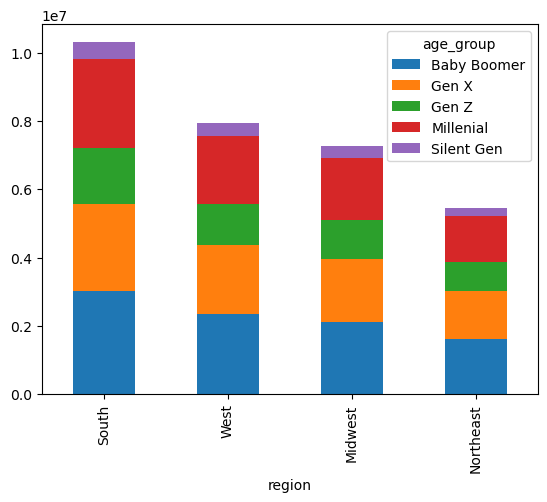

In [48]:
# Create age-region bar chart
age_region_bar = age_region_cross.reindex(['South', 'West', 'Midwest', 'Northeast']).plot(kind='bar', stacked=True)

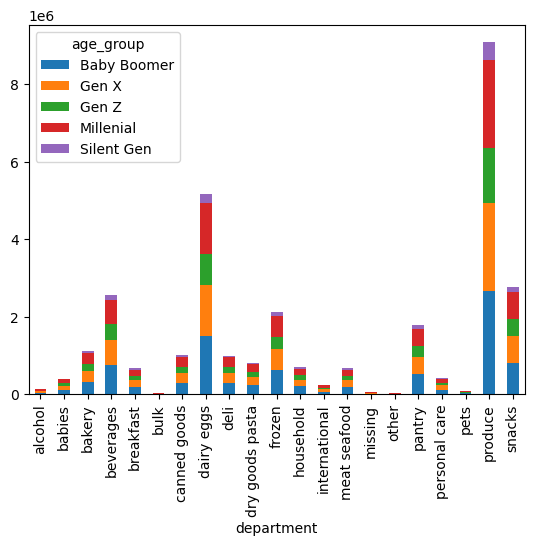

In [49]:
# Create age-departments bar chart
age_depts_bar = age_depts_cross.plot(kind = 'bar', stacked = True)

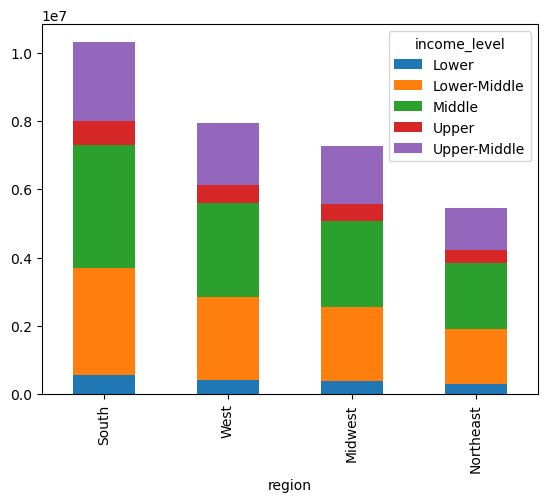

In [50]:
# Create income-regions bar chart
income_region_bar = income_region_cross.reindex(['South', 'West', 'Midwest', 'Northeast']).plot(kind = 'bar', stacked = True)

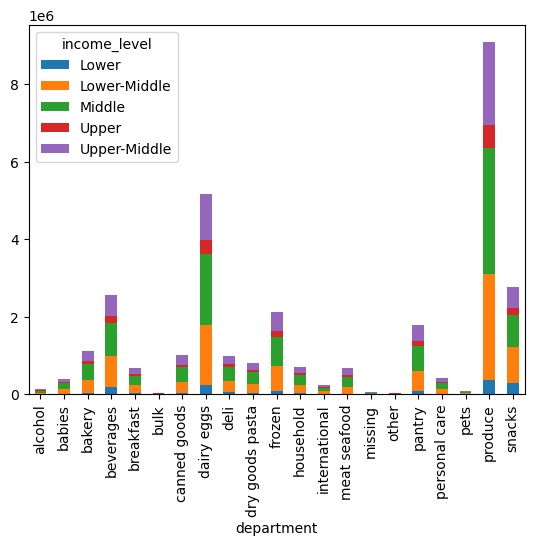

In [51]:
# Create income-departments bar chart
income_depts_bar = income_depts_cross.plot(kind = 'bar', stacked = True)

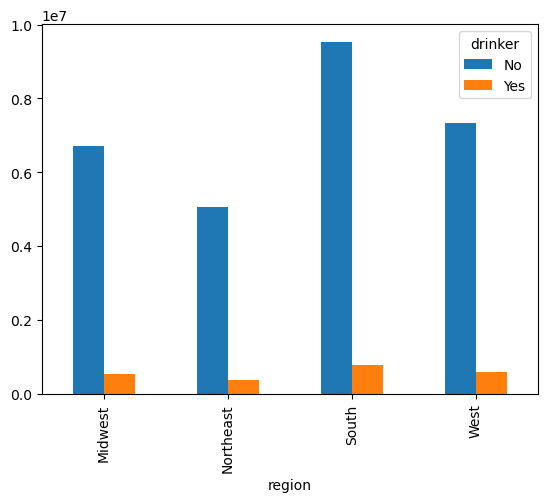

In [52]:
# Create drinker-region bar chart
drink_region_bar = drink_region_cross.plot(kind = 'bar', stacked = False)

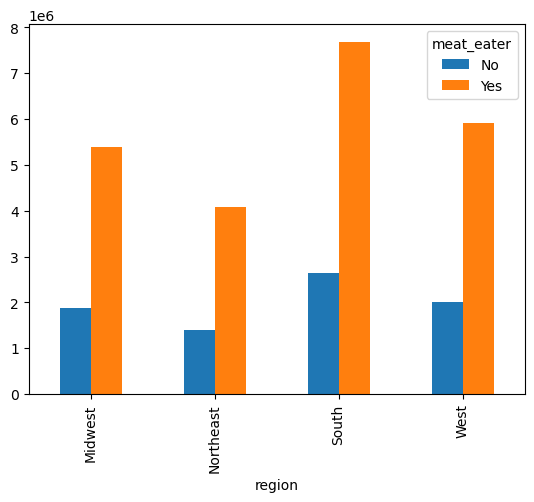

In [53]:
# Create meat-eater by regions bar chart
meat_region_bar = meat_region_cross.plot(kind = 'bar', stacked = False)

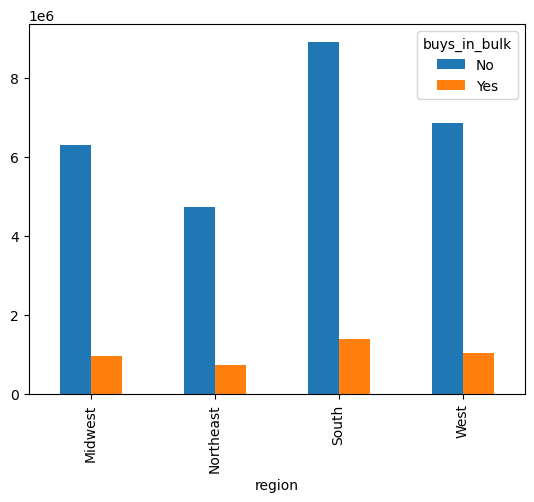

In [54]:
# Create buys-in-bulk by region bar chart
bulk_region_bar = bulk_region_cross.plot(kind = 'bar', stacked = False)

In [55]:
# Export charts into project folder
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'))
drinker_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'drinker_bar.png'))
meat_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'meat_pie.png'))
bulk_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bulk_pie.png'))
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))
age_depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar.png'))
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_bar.png'))
income_depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar.png'))
drink_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'drink_region_bar.png'))
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_bar.png'))
bulk_region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bulk_region_bar.png'))

## 10. Tidy up script, export final data set, save notebook

In [56]:
df_acc_d.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'IC_final_data.pkl'))

#### Charts for achievement questions

In [23]:
# Create crosstab to compare price range and departments
price_range_depts_cross = pd.crosstab(df_acc_d['department'], df_acc_d['price_range_loc'], dropna = False)

In [24]:
price_range_depts_cross

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


Text(0, 0.5, 'Product Department')

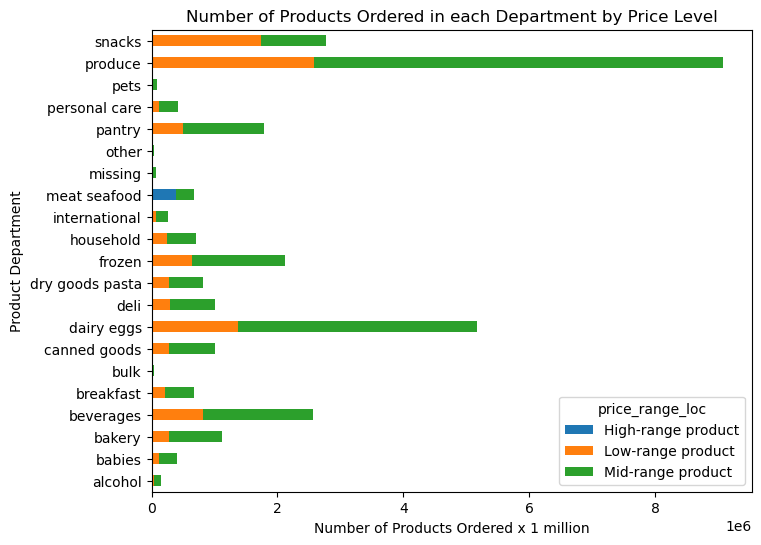

In [57]:
# Create price range by departments bar char
fig, ax = plt.subplots(figsize = (10,6))
plt.subplots_adjust(left = 0.3)
plt.title('Number of Products Ordered in each Department by Price Level')
price_range_depts_bar = price_range_depts_cross.plot(kind = 'barh', ax = ax, stacked = True)
ax.set_xlabel('Number of Products Ordered x 1 million')
ax.set_ylabel('Product Department')

In [63]:
# Check distribution of 'price_range_loc' variable
df_acc_d['price_range_loc'].value_counts()

price_range_loc
Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: count, dtype: int64

Text(0.5, 0, 'Number of Products Ordered x 10 million')

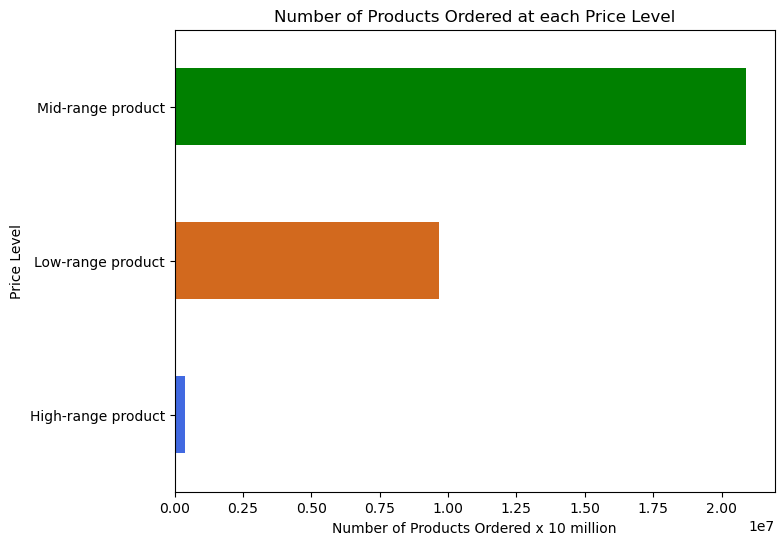

In [64]:
# Create price range label bar chart
plt.figure(figsize = (10,6))
plt.subplots_adjust(left = 0.3)
plt.title('Number of Products Ordered at each Price Level')
price_bar = df_acc_d['price_range_loc'].value_counts().sort_values().plot.barh(color = ['royalblue', 'chocolate', 'green'])
plt.ylabel('Price Level')
plt.xlabel('Number of Products Ordered x 10 million')

In [27]:
# Find top 20 products most frequently ordered
top_prods = df_acc_d['product_name'].value_counts().head(20)

In [28]:
top_prods

product_name
Banana                      453164
Bag of Organic Bananas      366403
Organic Strawberries        255988
Organic Baby Spinach        231772
Organic Hass Avocado        206799
Organic Avocado             168267
Large Lemon                 145397
Strawberries                136330
Limes                       134751
Organic Whole Milk          133514
Organic Raspberries         132945
Organic Yellow Onion        109219
Organic Garlic              105639
Organic Zucchini            100664
Organic Blueberries          95637
Cucumber Kirby               92612
Organic Fuji Apple           85941
Organic Lemon                84608
Apple Honeycrisp Organic     82349
Organic Grape Tomatoes       80756
Name: count, dtype: int64

Text(0, 0.5, 'Product Name')

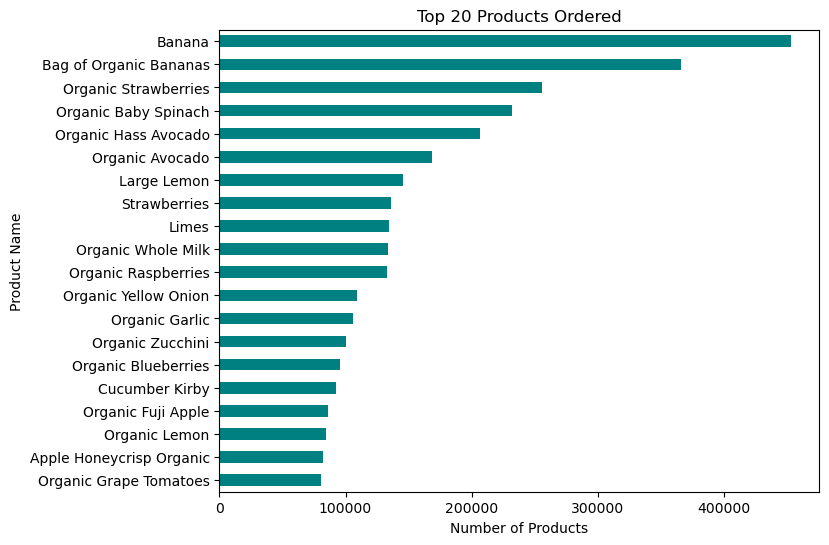

In [65]:
# Create histogram of top 20 items ordered
plt.figure(figsize = (10,6))
plt.subplots_adjust(left = 0.3)
plt.title('Top 20 Products Ordered')
top_prods_hist = top_prods.sort_values().plot.barh(color = 'teal')
plt.xlabel('Number of Products')
plt.ylabel('Product Name')

In [66]:
# Export achievemtnt charts
price_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_bar.png'))
price_range_depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_depts_bar.png'))
top_prods_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top_prods_hist.png'))